In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# -------------------------
# 1. Load and Preprocess Data
# -------------------------
# Load the MNIST dataset (handwritten digits)
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape data to add the channel dimension (since images are grayscale)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images  = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

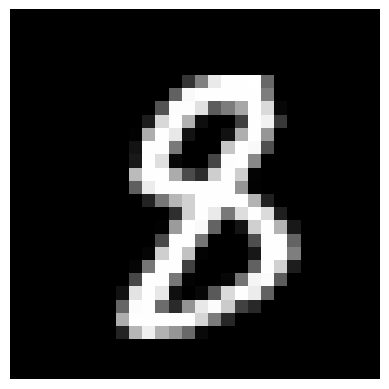

In [4]:
plt.imshow(test_images[1287].reshape(28,28), cmap='gray')
plt.axis('off')
plt.savefig('digit.png')

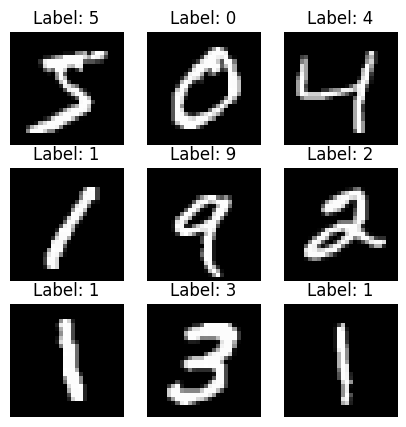

In [5]:
# Optionally, visualize a few training images
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [6]:
# -------------------------
# 2. Build the Model (CNN)
# -------------------------
model = models.Sequential([
    # First convolutional layer
    layers.Input(shape = (28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output and add dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output neurons for 10 classes
])

# Print model summary
model.summary()

# -------------------------
# 3. Compile the Model
# -------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# -------------------------
# 4. Train the Model
# -------------------------
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9002 - loss: 0.3251 - val_accuracy: 0.9832 - val_loss: 0.0529
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9842 - loss: 0.0525 - val_accuracy: 0.9876 - val_loss: 0.0394
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9907 - loss: 0.0308 - val_accuracy: 0.9881 - val_loss: 0.0369
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9871 - val_loss: 0.0385
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9910 - val_loss: 0.0268


In [10]:
# -------------------------
# 5. Evaluate the Model
# -------------------------
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy: {:.3f}".format(test_acc))

# -------------------------
# 6. Make Predictions
# -------------------------
# Predict on the first 5 test images
predictions = model.predict(test_images[:2])
print(predictions)
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted classes:", predicted_classes)
print("True labels:     ", test_labels[:2])

313/313 - 1s - 2ms/step - accuracy: 0.9910 - loss: 0.0268
Test Accuracy: 0.991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[1.32620681e-09 1.35608405e-08 8.53860413e-08 6.12969018e-08
  8.75827189e-10 3.36075542e-11 1.20559533e-15 9.99999762e-01
  8.98978780e-10 1.42354590e-08]
 [1.97744154e-09 3.10393466e-09 1.00000000e+00 7.33995018e-11
  7.58707125e-11 7.31643303e-17 7.91717003e-09 3.69751785e-10
  1.63613220e-10 2.23238745e-12]]
Predicted classes: [7 2]
True labels:      [7 2]


In [11]:
model.save('mnist.h5')

In [12]:
smodel = models.load_model('mnist.h5')

In [13]:
# -------------------------
# 5. Evaluate the Model
# -------------------------
test_loss, test_acc = smodel.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy: {:.3f}".format(test_acc))

# -------------------------
# 6. Make Predictions
# -------------------------
# Predict on the first 5 test images
predictions = smodel.predict(test_images[:2])
print(predictions)
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted classes:", predicted_classes)
print("True labels:     ", test_labels[:2])

313/313 - 1s - 3ms/step - accuracy: 0.9910 - loss: 0.0268
Test Accuracy: 0.991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[1.32620681e-09 1.35608405e-08 8.53860413e-08 6.12969018e-08
  8.75827189e-10 3.36075542e-11 1.20559533e-15 9.99999762e-01
  8.98978780e-10 1.42354590e-08]
 [1.97744154e-09 3.10393466e-09 1.00000000e+00 7.33995018e-11
  7.58707125e-11 7.31643303e-17 7.91717003e-09 3.69751785e-10
  1.63613220e-10 2.23238745e-12]]
Predicted classes: [7 2]
True labels:      [7 2]


In [2]:
model = models.load_model('mnist.h5')

In [13]:
import cv2

path = 'digit.png'
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img = (img/255.0).reshape((1,28,28,1))
pred = model.predict(img).argmax(axis = 1)
print(pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
8
